# Airbnb: Gaining insights on Seattle and Boston Listings

## Business Understanding of the problem
There are 3 questions we would like to answer from our data.
- Does price have any impact on review scores in Seattle and Boston?
- How do Seattle and Boston homeowners describe their houses? Is there a difference in the way top reviewed houses are described?
- What are the best neighbourhoods to stay in Seattle and Boston?

These questions once answered will help us to uncover the underlying trends in both Boston and Seatlle while highlighting the differences between the two cities at the same time.

To get started let's import all the libraries

In [28]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

## Data Understanding of the problem
Lets load the listings data and then check how both the listings dataframes for both the cities are and see what columns we have and the underlying data structures.

In [12]:
df_seattle = pd.read_csv('seattle/seattle_listings.csv')
df_boston = pd.read_csv('boston-airbnb-open-data/boston_listings.csv')

**Let's explore the Seattle data first.**

In [13]:
#load sample Seattle data
df_seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [95]:
df_seattle.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [93]:
df_seattle.shape

(3818, 92)

We see that the Seattle listings dataframe has 92 columns in total and 3818 rows. Let's look at stats of different numeric columns in the data to see if there are any columns with many null values and if there are any additional insights to gather.

In [94]:
df_seattle.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


We see that there are 30 numeric columns. The review fields have data in between 3160 and 3171 rows only. The review_scores_rating field has 25%ile at 93 out of 100 indicating that majority of the rating being over 90.

Next let's see the correlation between the different columns in the Seattle data

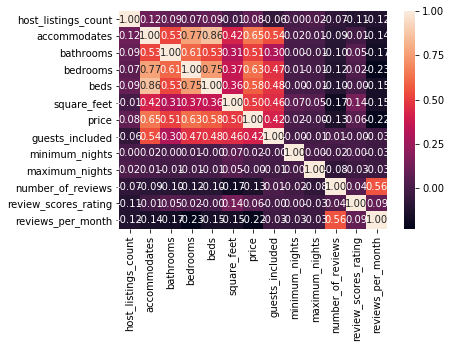

In [108]:
#see correlation in data for Seattle
sns.heatmap(df_seattle.corr(), annot=True, fmt='.2f');

We see high correlation between Accommodates, Bathrooms, Bedrooms, beds, square_feet, guests_included and price. This is in expected lines.

**Now let's explore Boston data.**

In [18]:
df_boston.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [15]:
df_boston.shape

(3585, 95)

The total listings are 3585. Unlike Seattle, Boston has 95 columns instead of 92. Let's check what they are.

In [17]:
df_boston.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

The extra columns in the Boston data vs the Seattle data are **'access', 'interaction', and 'house_rules'.**

In [21]:
df_boston.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


We see that there are 33 numeric columns. The review fields have data in between 2762 and 2767 rows only.

Like we did for Seattle data, let's check the correlation in Boston data as well.

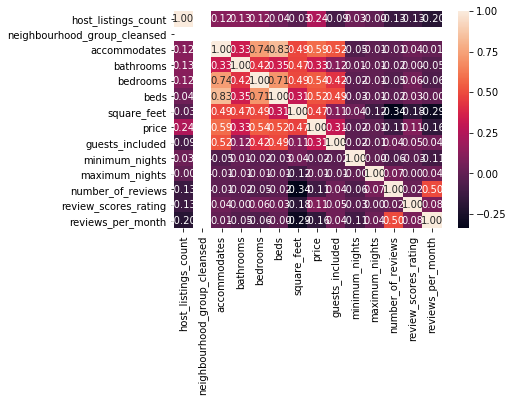

In [113]:
#see correlation in data for Boston
sns.heatmap(df_boston.corr(), annot=True, fmt='.2f');

We see high correlation between Accommodates, Bathrooms, Bedrooms, beds, square_feet, guests_included and price. This is also in expected lines.

## Data Preparation

Looks like it has a lot of columns and many of which are not needed like the **listing _url**. Let's reduce the df columns to those which we think are relevant.

In [23]:
#make a list of unwanted columns
unwanted_columns = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'space', 'description', \
                    'experiences_offered', 'neighborhood_overview', \
                    'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name','host_location', 'host_about', 'host_thumbnail_url', \
                    'host_picture_url', 'host_neighbourhood', 'host_has_profile_pic', 'host_identity_verified', \
                    'street', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'weekly_price', 'monthly_price',\
                    'calendar_updated', 'has_availability', 'host_total_listings_count',
       'availability_30', 'availability_60', 'availability_90', 'host_verifications',
       'availability_365', 'calendar_last_scraped', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'first_review', 'last_review',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license', 'jurisdiction_names', 'require_guest_profile_picture',
       'require_guest_phone_verification', 'calculated_host_listings_count']

We have removed all columns which we think do not add any value for the purpose of our 3 questions we set out to answer. For the review scores, we choose to use the overall rating score and remove all the individual parameters.

In [25]:
#create a function to remove the columns mentioned above
def drop_unwanted_columns_df(df):
    ''' 
    Input - A dataframe having all columns which are part of the list "unwanted_columns"
    Output - A dataframe having all the columns in the list "unwanted_columns" dropped.
    '''
    df = df.drop(labels = unwanted_columns, axis =1)
    return df

#### Data Preparation for Question 1

In [27]:
#create a function to clean the price and make it usable to answer our question
def clean_price(df):
    ''' 
    Input - A dataframe which has a column named "price"
    Output - Input dataframe with a cleaned "price" column.
    Cleaning includes removing the "$" sign at the beginnning, and any "," in the value.
    It will then convert the value to a numeric format.
    Finally it will drop any rows in the dataframe which has NAN/NULL values in the "price" column.
    '''
    df['price']=df['price'].apply(lambda x: x.strip("$|,"))
    df['price']=df['price'].apply(lambda x: x.replace(',',""))
    #convert price from string to numeric values
    df['price'] = pd.to_numeric(df['price'])
    df.dropna(subset=['price'], inplace=True)
    return df

In [1]:
def clean_review_ratings(df):
    '''
    Input - A dataframe which has a column named "price"
    Output - Input dataframe with a cleaned "review_scores_rating" column.
    It drops any rows in the dataframe which has NAN/NULL values in the "review_scores_rating" column.
    '''
    df.dropna(subset=['review_scores_rating'], inplace=True)
    return df

Now that we have our functions ready, let's **transform our Seattle data first.**

In [114]:
df_seattle = drop_unwanted_columns_df(df_seattle)
df_seattle = clean_price(df_seattle)
df_seattle = clean_review_ratings(df_seattle)

df_seattle.shape

(3171, 33)

In [157]:
df_seattle.columns

Index(['Unnamed: 0', 'summary', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'requires_license', 'instant_bookable', 'cancellation_policy',
       'reviews_per_month'],
      dtype='object')

**Repeating the steps for Boston data**

In [29]:
df_boston = drop_unwanted_columns_df(df_boston)
df_boston = clean_price(df_boston)
df_boston = clean_review_ratings(df_boston)

df_boston.head(2)

,summary,access,interaction,house_rules,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,requires_license,instant_bookable,cancellation_policy,reviews_per_month
1,Charming and quiet room in a second floor 1910...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,2012-06-07,within an hour,100%,100%,f,1,...,0,$0.00,2,15,36,94.0,f,t,moderate,1.30
2,"Come stay with a friendly, middle-aged guy in ...","I am living in the apartment during your stay,...","ABOUT ME: I'm a laid-back, friendly, unmarried...","I encourage you to use my kitchen, cooking and...",2009-05-11,within a few hours,100%,88%,t,1,...,1,$20.00,3,45,41,98.0,f,f,moderate,0.47


Next up, let's look to get our data prepared for our second question.

#### Data preparation for question 2

As we look to see how the owners write the summaries for their houses, we will need to ensure that the summary column is prepared and ready.

In [120]:
#clean Summary column in both datasets
df_seattle.dropna(subset=['summary'], inplace=True)
df_boston.dropna(subset=['summary'], inplace=True)

Now that we have our data prepared and ready, let's proceed to answer our first question

It's important to save our work either into a csv, or as a checkpoint (in case of models) so as to not repeat the work. Let's go ahead and save our prepared files for easy access in future.

In [130]:
#save cleaned Seattle and Boston files
df_seattle.to_csv('Seattle_cleaned.csv')
df_boston.to_csv('Boston_cleaned.csv')

In [2]:
#load cleaned Seattle and Boston CSVs
df_seattle = pd.read_csv('Seattle_cleaned.csv')
df_boston = pd.read_csv('Boston_cleaned.csv')

## Data Analysis

## Question 1: 
**Does price have an impact on the review scores? **
Let's check both the fields and see if we have to do any data wrangling.

In [109]:
df_seattle[['price','review_scores_rating']].describe()

,price,review_scores_rating
count,3171.000000,3171.000000
mean,126.802586,94.539262
std,90.007172,6.606083
min,22.000000,20.000000
25%,75.000000,93.000000
50%,100.000000,96.000000
75%,150.000000,99.000000
max,1000.000000,100.000000


### Price vs Review Ratings: Scatter Plots for Seattle & Boston

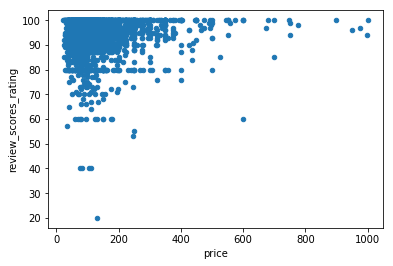

In [116]:
#scatter plot for price vs Review Ratings for Seattle
df_seattle.plot.scatter('price','review_scores_rating');

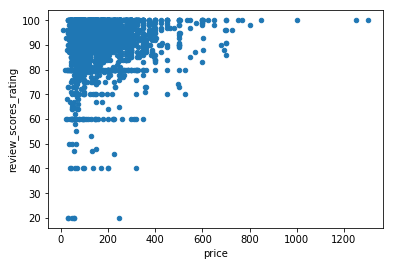

In [117]:
#scatter plot for price vs Review Ratings for Boston
df_boston.plot.scatter('price','review_scores_rating');

In [118]:
df_boston[['price','review_scores_rating']].describe()

,price,review_scores_rating
count,2772.000000,2772.000000
mean,166.684343,91.916667
std,112.972898,9.531686
min,11.000000,20.000000
25%,85.000000,89.000000
50%,145.000000,94.000000
75%,215.000000,98.250000
max,1300.000000,100.000000


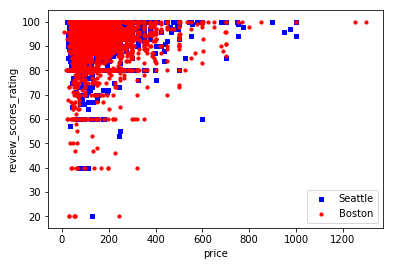

In [25]:
#combine scatter plots of Seattle and Boston
plt.scatter(df_seattle['price'], df_seattle['review_scores_rating'], s=10, c='b', marker="s", label='Seattle')
plt.scatter(df_boston['price'], df_boston['review_scores_rating'], s=10, c='r', marker="o", label='Boston')
plt.legend(loc='lower right');
plt.xlabel('price')
plt.ylabel('review_scores_rating')
plt.show()

## Results Discussion Q1
It is clear from the above graph that there is no difference in the dynamics of pricing vs reviews in Seattle and Bosotn. They follow a similar pattern in both the cities. The pattern however by itself is interesting. As the price goes up, the number of overall ratings come down which is as expected as the total number of people staying will also come down. And the average rating goes up as the price goes up, which again can be attributed to better services, and facilities being available at higher price points.

## Question 2: 
**How do Seattle and Boston homeowners describe their houses?
Is there a difference in the way top reviewed houses are described?**

In [4]:
#build word cloud function
def build_word_cloud(df_column):
    '''
    input - A dataframe column with categorical words in it
    output - A wordcloud of the top words used in it. 
    It excludes obvious words we do not want to see in the word cloud along 
    with the standard STOPWORDS in the wordcloud module
    '''
    stop_words = ["seattle", "Boston","room"] + list(STOPWORDS)
    
    wordcloud = WordCloud(stopwords=stop_words).generate(' '.join(df_column))
    #display the generated image
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

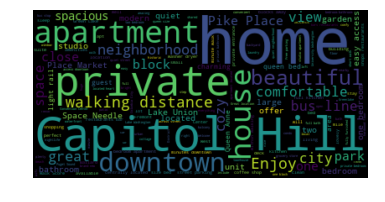

In [124]:
#Seattle listing summary word cloud:
build_word_cloud(df_seattle['summary'])

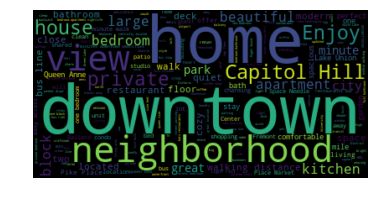

In [128]:
#Seattle word cloud for top 25%ile listings
build_word_cloud(df_seattle.summary[df_seattle.review_scores_rating>99])

## Results Discussion Q2: Seattle
**Seattle Word Cloud discussion**
- At an aggregate level for overall listings within Seattle, the summaries seem to have the following words at a higher frequency: beautiful, comfortable, private home, being near downtown, things being available at walking distance. Capitol Hill area also seems to be very popular. 
- When you compare it against the top 25 percentile homes in Seattle (75th percentile for review ratings in Seattle is 99), majority of the words are similar. However, there are few interesting words which had higher frequency amongst those with high ratings. These are neighborhood, kitchen, large, and downtown. 

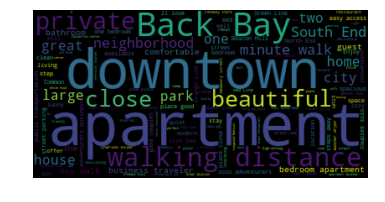

In [126]:
#Boston Listing summary word cloud:
build_word_cloud(df_boston['summary'])

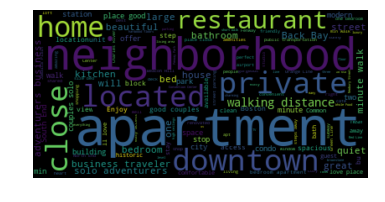

In [17]:
#Boston word cloud for top 25%ile listings
build_word_cloud(df_boston.summary[df_boston.review_scores_rating>99])

## Results Discussion Q2: Boston 
**Boston Word Cloud discussion**
- At an aggregate level for overall listings within Boston, the summaries seem to have the following words at a higher frequency: downtown, Back bay location, beautiful, park, South end, private home, and park.
- When you compare it against the top 25 percentile homes in Boston (75th percentile for review ratings in Boston is 98), majority of the words are similar. However, there are few interesting words which had higher frequency amongst those with high ratings. These are neighbourhood, located, being near restaurant, and close. Being close to happening places, seem to be the major driver behind getting higher ratings in Boston as per the word cloud.

## Question 3: 
**What are the best neighbourhoods to stay in Seattle and Boston?**

In [6]:
def get_best_neighbourhoods(df, min_listings, top_x):
    
    '''
    Inputs: 
    1. df = A dataframe with columns named "neighbourhood_cleansed", and "review_scores_rating"
    2. min_listings = minimum number of listings needed in neighbourhoods
    3. top_x = show top x results in output
    Output - A dataframe with 3 columns - Best neighbourhoods, their average review scores, and the number of listings 
    in these neighborhoods
    '''
    
    #Get mean review ratings by neighbourhood
    df_q3a = df.groupby('neighbourhood_cleansed', as_index=False)['review_scores_rating'].mean().\
    sort_values('review_scores_rating', ascending=False)
    
    #Get count of listings by neighbourhood
    df_q3b=df.neighbourhood_cleansed.value_counts().rename_axis('neighbourhood_cleansed').reset_index(name='counts')
    
    # Merge both averages of review ratings and number of listings into one table
    df_q3 = pd.merge(df_q3a, df_q3b, on='neighbourhood_cleansed')
    
    #get neighbourhoods ratings, and number of listings available
    return df_q3[df_q3['counts']>=min_listings].head(top_x)

In [4]:
#Top 10 neighbourhoods in Seattle with at least 10 listings
df_seattle_q3 = get_best_neighbourhoods(df_seattle,10,10)
df_seattle_q3

,neighbourhood_cleansed,review_scores_rating,counts
1,Madrona,97.538462,39
3,Southeast Magnolia,97.214286,14
4,Harrison/Denny-Blaine,97.200000,10
5,Genesee,96.933333,30
6,North Beach/Blue Ridge,96.909091,11
8,North Delridge,96.666667,24
9,Whittier Heights,96.571429,21
10,North College Park,96.428571,14
11,Minor,96.270492,122
12,Broadview,96.266667,15


In [5]:
#Top 10 neighbourhoods in Boston with at least 10 listings
df_boston_q3 = get_best_neighbourhoods(df_boston,10,10)
df_boston_q3

,neighbourhood_cleansed,review_scores_rating,counts
1,Roslindale,95.489362,47
2,West Roxbury,95.156250,32
3,South Boston Waterfront,94.431034,58
4,Jamaica Plain,94.266667,285
5,South Boston,94.026490,151
7,Charlestown,93.731343,67
8,North End,93.687500,112
9,South End,93.478261,253
10,Beacon Hill,93.427711,166
11,Bay Village,93.000000,16


In [7]:
#create plot function
def build_plot_best_beighbourhoods(df):
    '''
    Input - A dataframe with columns named "neighbourhood_cleansed", "review_scores_rating", and "counts"
    Output -  A bar plot and line plot in one. Neighborhood is on the common X-axis and 
    the "counts" and "review_scores_rating" are on the Y-axis for the bar plot and the line plot respectively.
    '''
    fig, ax = plt.subplots(figsize= (20,8))
    ax1 = ax.twinx()
    sns.barplot(ax=ax, x=df['neighbourhood_cleansed'], y=df['counts']);
    sns.lineplot(ax=ax1,x=df['neighbourhood_cleansed'], y=df['review_scores_rating']);

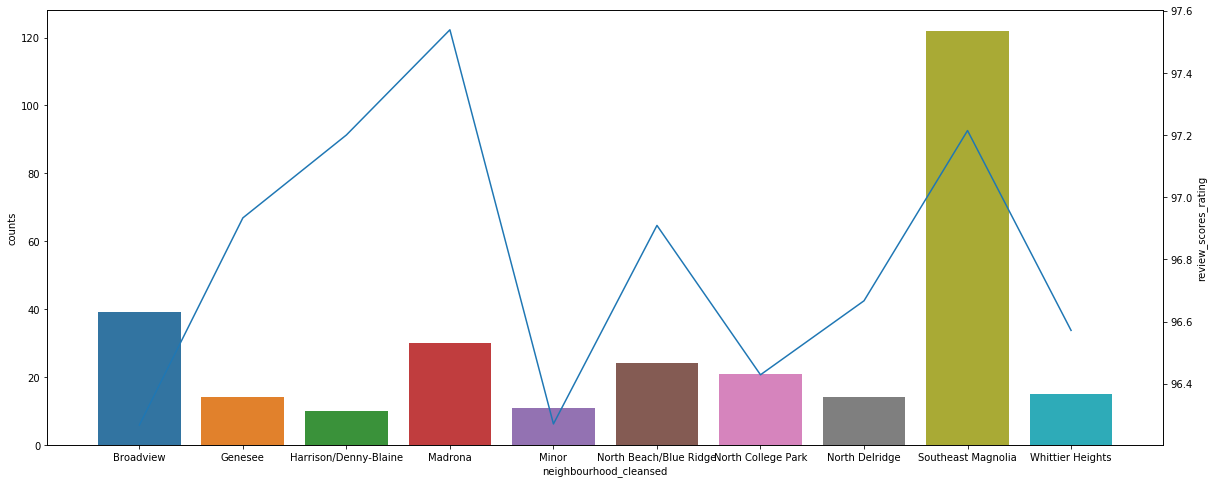

In [13]:
#Seattle best neighbourhoods plot
build_plot_best_beighbourhoods(df_seattle_q3)

## Results Discussion Q3: Seattle

We can clearly see that in **Seattle**, amongst the nieghbourhoods with at least 10 listings, Southeast Magnolia has a lot more listings (bar plot) than any other neighbourhood with the 2nd best review rating scores (line plot).

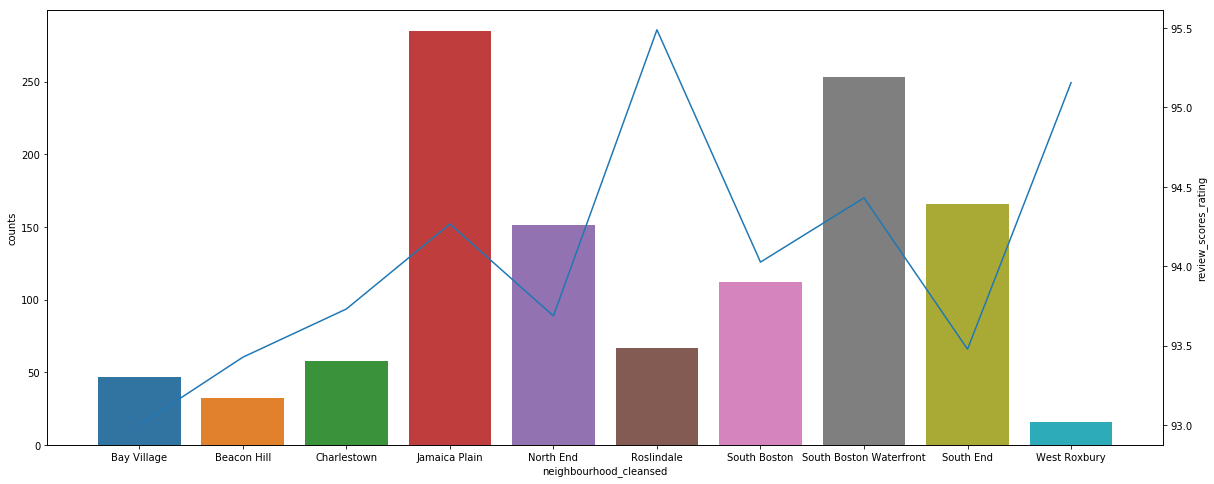

In [14]:
#Boston best neighbourhoods plot
build_plot_best_beighbourhoods(df_boston_q3)

## Results Discussion Q3: Boston

Unlike Seattle, in **Boston**, amongst the nieghbourhoods with at least 10 listings, there is no clear one neighbourhood but rather few choices depending on what one wants. The balanced choices are between Jamaica Plain and South Boston Waterfront which have relatively high number of listings and high review ratings. However if one wants to go purely by highest review rating scores, then he/she has to look at Roslindale and West Roxbury neighbourhoods.